<a href="https://colab.research.google.com/github/Emyfoton/Codigos_pregrado/blob/main/Bit%C3%A1cora_Interf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d_solo = np.array([0, 0.9, 1.2, 2.1, 2.9, 3.8, 4.1, 4.9, 5.1, 5.9, 6.4, 7, 7.2, 7.9, 8.2, 8.8, 9.3, 9.9, 10.5, 10.8, 11.2, 11.7])

N_solo = np.array([6, 12, 20, 28, 32, 38, 44, 49, 54, 59, 64, 70, 75, 80, 86, 92, 97, 103, 108, 113, 119, 124])

xd_N = np.arange(2, 23)

d_xd = np.array([1, 1.5, 1.8, 2, 2.3, 2.7, 3, 3.3, 3.8, 4.1, 4.3, 4.8, 5, 5.2, 5.7, 5.9, 6.2, 6.6, 7, 7.1, 7.4])

xd_N

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22])

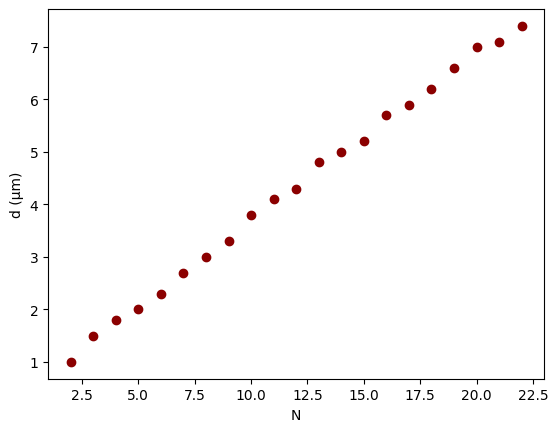

In [ ]:
plt.scatter(xd_N, d_xd, c='darkred')
plt.xlabel('N')
plt.ylabel('d (µm)')
plt.title('')
plt.show()

In [ ]:
def ajuste_l(x, m, b):
  return x*m + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(ajuste_l, xd_N, d_xd)

xd= 0.331*2000
xd

662.0

In [ ]:
lamb = popt[0]*2000

errlamb = np.sqrt(np.diag(pcov))[0]*2000

lamb, errlamb

(np.float64(642.077922077922), np.float64(6.437029480783563))

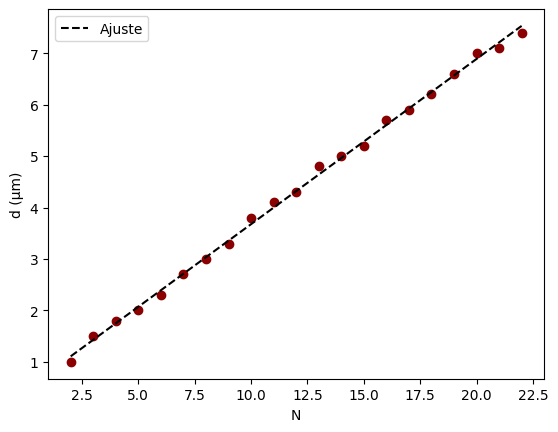

In [ ]:
plt.scatter(xd_N, d_xd, c='darkred')
plt.xlabel('N')
plt.ylabel('d (µm)')
plt.title('')
plt.plot(xd_N, ajuste_l(xd_N, *popt), c ='k', linestyle = '--' ,label='Ajuste')
plt.legend()
plt.show()

In [ ]:
theta = np.array([0, 3, 6, 9, 13])

N_th = np.array([8, 15, 22, 28, 33])

n_V = ((2*t - N_th*lamb)*(1-np.cos(theta)))/(2*t*(1-np.cos(theta))-N_th*lamb)

NameError: name 't' is not defined

In [ ]:

aja = np.array([0., 0.5 * np.pi])

ya = np.cos(aja)

ya

array([1.000000e+00, 6.123234e-17])

In [ ]:
P = Quantity([0, 18, 24, 30.5, 39, 44, 47.5, 49], 'cmHg')

N_p = np.array([5, 10, 14, 18, 22, 26, 29, 32])

In [ ]:
delta_p = P[-1] - P[0]

lamb0 = Quantity(633, 'nm')

t_v = Quantity(3.1, 'mm')

m = delta_p/N_p[-1]

n = P*(lamb0/(2*t_v*m)) +1

n

Magnitude,[1.0 1.0012001579986833 1.0016002106649111 1.0020336010533246 1.0026003423304806 1.0029337195523371 1.0031670836076365 1.0032670967741935]
Units,dimensionless


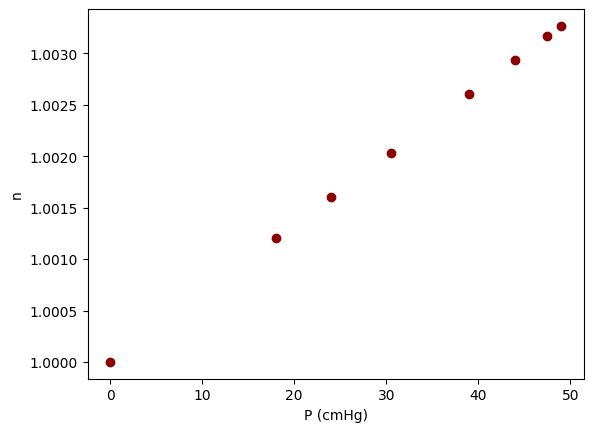

In [ ]:

plt.scatter(P.m, n.m, c='darkred')
plt.xlabel('P (cmHg)')
plt.ylabel('n')
plt.title('')
plt.show()

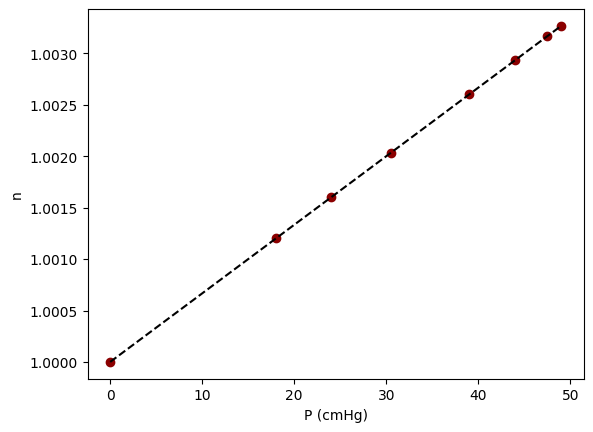

In [ ]:
popt_n , pcov_n = curve_fit(ajuste_l, P.m, n.m)


plt.scatter(P.m, n.m, c='darkred')
plt.plot(P.m, ajuste_l(P.m, *popt_n), c ='k', linestyle = '--' ,label='Ajuste')
plt.xlabel('P (cmHg)')
plt.ylabel('n')
plt.title('')
plt.show()

In [ ]:
m_p = popt_n[0]
err_m_p = np.sqrt(np.diag(pcov_n))[0]

m_P = ufloat(m_p, err_m_p) * 1/ureg.cmHg
m_P

<Quantity((6.66754+/-0.00000)e-05, '1 / centimeter_Hg')>

In [ ]:
b_p = popt_n[1]

err_b_p = np.sqrt(np.diag(pcov_n))[1]

b_P = ufloat(b_p, err_b_p)
b_p

np.float64(1.0)

In [ ]:
n_atm = m_P*Quantity(76, 'cmHg') + b_P

n_atm

<Quantity(1.00507+/-0.00000, 'dimensionless')>

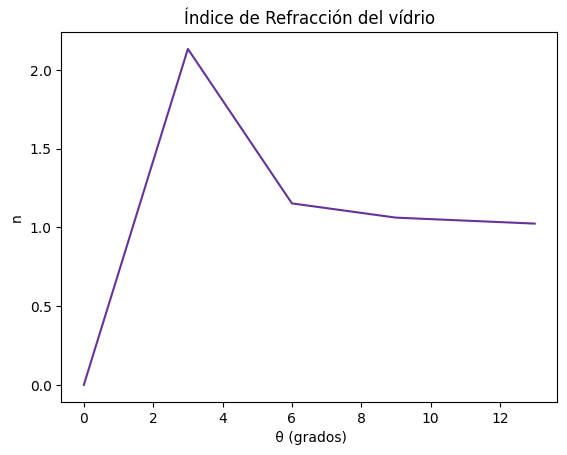

In [ ]:
#Índice refracción

import numpy as np
import matplotlib.pyplot as plt


n= np.array([8, 7, 7, 7, 6])
theta= np.array([0, 3, 6, 9, 13])

t= 3040000
l=632.8

def i_refracción(theta):
  return ((2*t-n*l)*(1-np.cos(np.deg2rad(theta))))/(2*t*(1-np.cos(np.deg2rad(theta)))-n*l)


nvidrio= i_refracción(theta)

plt.plot(theta, nvidrio, c="Rebeccapurple")
plt.title("Índice de Refracción del vídrio")
plt.xlabel(" θ (grados)")
plt.ylabel("n")
plt.show()